In [7]:
# montar google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import nltk
from nltk.corpus import mac_morpho
from nltk.tag import UnigramTagger
nltk.download('punkt')
nltk.download('mac_morpho')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Package mac_morpho is already up-to-date!


True

In [1]:
# abre arquivo de notícias
#descomentar a linha correspondente ao que deseja analisar

#notícias na íntegra
rawdata = open('/content/drive/My Drive/aneel-imprensa-2020/dados/texto_noticias_limpo.txt', 'r', encoding='UTF-8').read()

#apenas os títulos/manchetes
#rawdata = open('/content/drive/My Drive/aneel-imprensa-2020/dados/texto_titulos_limpo.txt', 'r', encoding='UTF-8').read()

str_noticias = rawdata

In [2]:
# lista para retirar palavras comuns e óbvias
lista_palavras_comuns = ['energia',
                         'institucional',
                         'aneel',
                         'elétrica',
                         'nacional',
                         'agência',
                         'conta',
                         'consumidores',
                         'ser',
                         'estado',
                         'ainda',
                         'mês',
                         'sobre',
                         'desde',
                         'disse',
                         'segundo',
                         'pode',
                         'ano',
                         'mil',
                         'milhões',
                         'dia',
                         'nesta',
                         'hoje',
                         'paulo',
                         'mato',
                         'grosso',
                         'janeiro',
                         'fevereiro',
                         'março',
                         'abril',
                         'maio',
                         'junho',
                         'julho',
                         'agosto',
                         'setembro',
                         'outubro',
                         'novembro',
                         'dezembro',
                         'segunda',
                         'terça',
                         'quarta',
                         'quinta',
                         'sexta',
                         'sábado',
                         'domingo',
                         'feira',
                         'além',
                         'disso',
                         'empresas',
                         'desse',
                         'estadão',
                         'conteúdo',
                         'partir',
                         'desta'
]

In [3]:
str_noticias = ' '.join(x for x in str_noticias.split() if x not in lista_palavras_comuns)

In [4]:
# tratamento com a palavra "novo" -> considerar "novo" o que for "novos", "nova" e "novas"
# tratamento com a palavra "públicos" -> considerar "públicos" o que for "pública"
# tratamento com a palavra "primeiro" -> considerar "primeiro" o que for "primeira"
str_noticias = str_noticias.replace(' novos ', ' novo ')
str_noticias = str_noticias.replace(' nova ', ' novo ')
str_noticias = str_noticias.replace(' novas ', ' novo ')
str_noticias = str_noticias.replace(' pública ', ' públicos ')
str_noticias = str_noticias.replace(' primeira ', ' primeiro ')

In [5]:
str_noticias.count(' novos ')

2

In [9]:
tokens = nltk.word_tokenize(str_noticias)

In [35]:
len(nltk.corpus.mac_morpho.words())

1170095

##PoS Tagging
Não executar esta parte se for executar bigramas ou trigramas, pois, caso contrário, vai exceder o limite de memória RAM.

In [36]:
#default tagger
tagger0 = nltk.DefaultTagger('N')

In [37]:
sentencas_treino = mac_morpho.tagged_sents()
etiquetador = UnigramTagger(sentencas_treino, backoff=tagger0)

etiquetado = etiquetador.tag(tokens)

In [38]:
etiquetado[:10]

[('prefeito', 'N'),
 ('mauá', 'N'),
 ('atila', 'N'),
 ('jacomussi', 'N'),
 ('psb', 'N'),
 ('decidiu', 'V'),
 ('dar', 'V'),
 ('tratamentos', 'N'),
 ('diferentes', 'ADJ'),
 ('duas', 'NUM')]

In [39]:
tags = [tag for (word, tag) in etiquetado]
frequent_tags = nltk.FreqDist(tags)
#list(frequent_tags.keys())[0:20]
frequent_tags.most_common(10)

[('N', 21704964),
 ('V', 4340110),
 ('ADJ', 3881643),
 ('PCP', 1669070),
 ('ADV', 608323),
 ('PROADJ', 574819),
 ('VAUX', 513497),
 ('PREP', 342970),
 ('NUM', 219502),
 ('NPROP', 191395)]

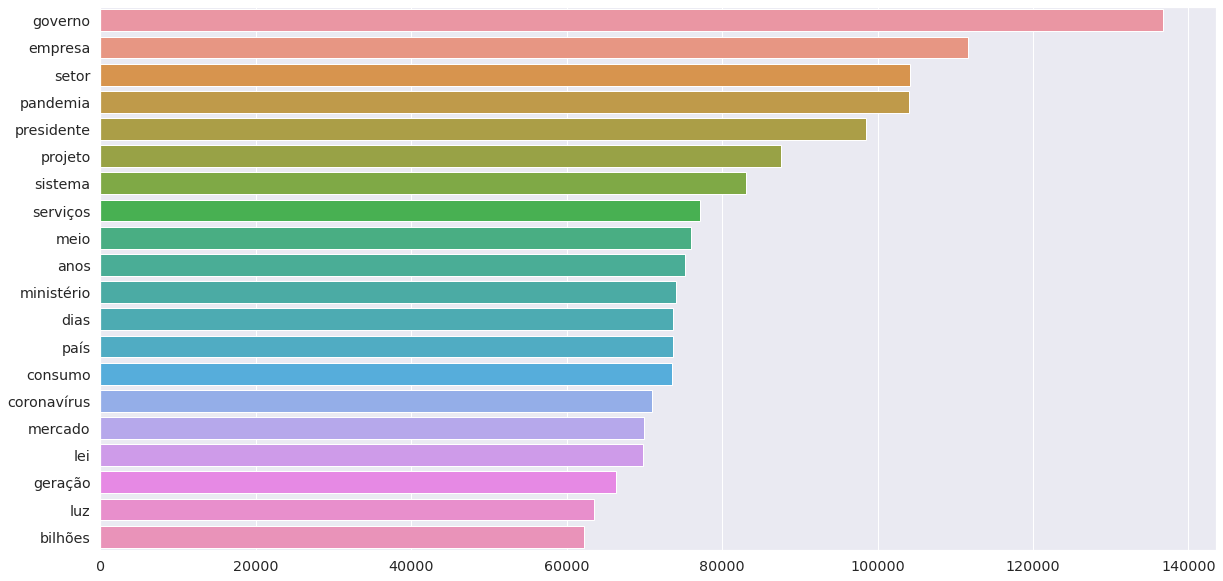

In [40]:
# Substantivos mais comuns
words = [word for (word, tag) in etiquetado if tag == 'N']
frequent_words = nltk.FreqDist(words)
#frequent_words.most_common(10)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

most_common_words = frequent_words.most_common(20)
most_common_words = pd.Series(dict(most_common_words))

#fig, ax = plt.subplots(figsize=(10,10))
#all_plot = sns.barplot(x=most_common_words.index, y=most_common_words.values, ax=ax)
#plt.xticks(rotation=30)

sns.set(font_scale = 1.3)
fig, ax = plt.subplots(figsize=(20,10))
all_plot = sns.barplot(y=most_common_words.index, x=most_common_words.values, ax=ax, orient='h')

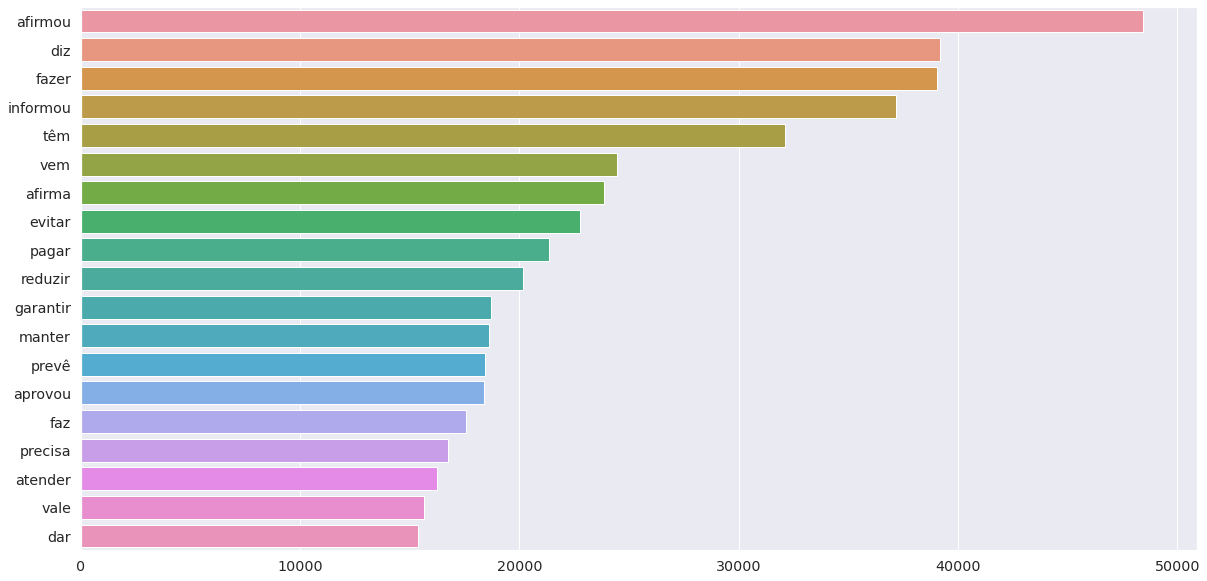

In [41]:
# Verbos mais comuns
words = [word for (word, tag) in etiquetado if tag == 'V']
frequent_words = nltk.FreqDist(words)
#frequent_words.most_common(10)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

most_common_words = frequent_words.most_common(21)[1:20]
most_common_words = pd.Series(dict(most_common_words))

#fig, ax = plt.subplots(figsize=(10,10))
#all_plot = sns.barplot(x=most_common_words.index, y=most_common_words.values, ax=ax)
#plt.xticks(rotation=30)

sns.set(font_scale = 1.3)
fig, ax = plt.subplots(figsize=(20,10))
all_plot = sns.barplot(y=most_common_words.index, x=most_common_words.values, ax=ax, orient='h')

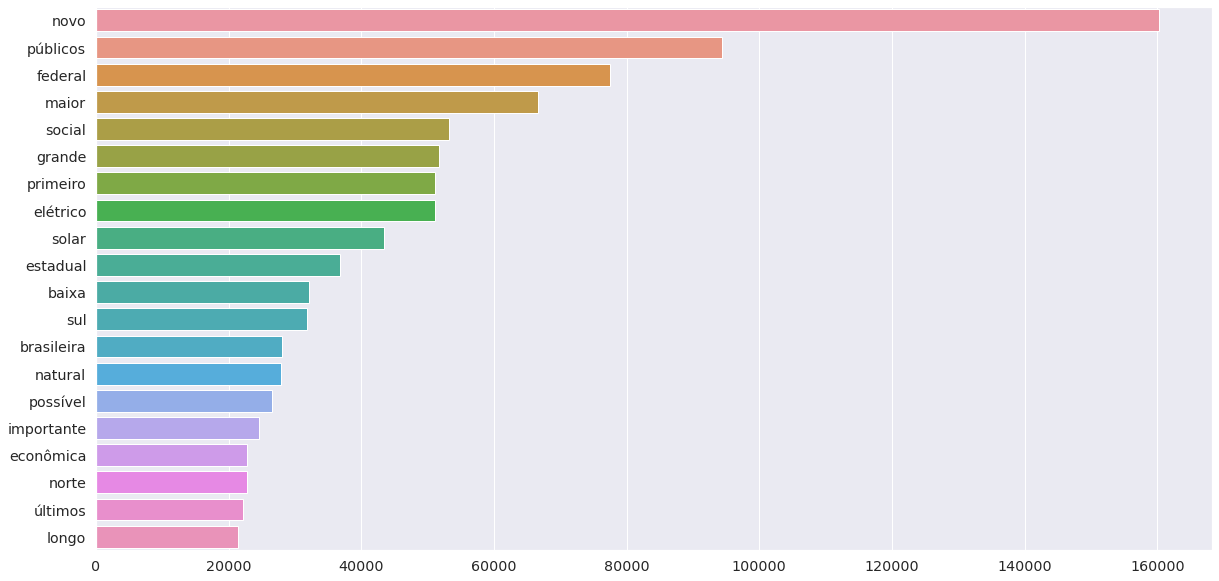

In [42]:
# Adjetivos mais comuns
words = [word for (word, tag) in etiquetado if tag == 'ADJ']
frequent_words = nltk.FreqDist(words)
#frequent_words.most_common(10)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

most_common_words = frequent_words.most_common(20)
most_common_words = pd.Series(dict(most_common_words))

#fig, ax = plt.subplots(figsize=(10,10))
#all_plot = sns.barplot(x=most_common_words.index, y=most_common_words.values, ax=ax)
#plt.xticks(rotation=30)

sns.set(font_scale = 1.3)
fig, ax = plt.subplots(figsize=(20,10))
all_plot = sns.barplot(y=most_common_words.index, x=most_common_words.values, ax=ax, orient='h')

In [43]:
frequent_words.most_common(30)

[('novo', 160203),
 ('públicos', 94333),
 ('federal', 77575),
 ('maior', 66707),
 ('social', 53251),
 ('grande', 51752),
 ('primeiro', 51190),
 ('elétrico', 51130),
 ('solar', 43460),
 ('estadual', 36761),
 ('baixa', 32182),
 ('sul', 31860),
 ('brasileira', 28055),
 ('natural', 27946),
 ('possível', 26515),
 ('importante', 24524),
 ('econômica', 22859),
 ('norte', 22742),
 ('últimos', 22236),
 ('longo', 21447),
 ('responsável', 21178),
 ('verde', 20849),
 ('brasileiro', 20480),
 ('próximos', 19420),
 ('grandes', 18921),
 ('principais', 18915),
 ('menor', 18761),
 ('transformador', 18274),
 ('civil', 18138),
 ('médio', 17972)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

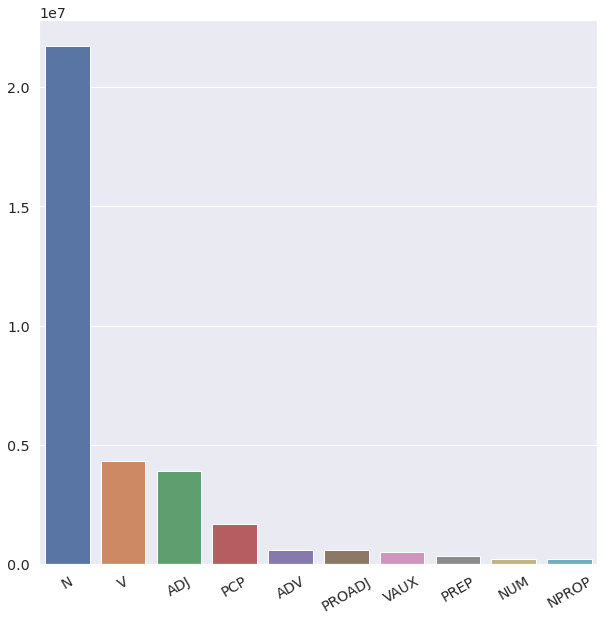

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

most_common_tags = frequent_tags.most_common(10)
most_common_tags = pd.Series(dict(most_common_tags))

fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=most_common_tags.index, y=most_common_tags.values, ax=ax)
plt.xticks(rotation=30)

##Bigramas

In [45]:
lista_bigramas = list(nltk.bigrams(tokens))
lista_bigramas[0:10]

[('prefeito', 'mauá'),
 ('mauá', 'atila'),
 ('atila', 'jacomussi'),
 ('jacomussi', 'psb'),
 ('psb', 'decidiu'),
 ('decidiu', 'dar'),
 ('dar', 'tratamentos'),
 ('tratamentos', 'diferentes'),
 ('diferentes', 'duas'),
 ('duas', 'autarquias')]

In [46]:
frequent_bigramas = nltk.FreqDist(lista_bigramas)
frequent_bigramas.most_common(10)

[(('ministério', 'minas'), 36583),
 (('projeto', 'lei'), 31574),
 (('setor', 'elétrico'), 29725),
 (('novo', 'coronavírus'), 29597),
 (('governo', 'federal'), 26050),
 (('jair', 'bolsonaro'), 24165),
 (('gás', 'natural'), 23286),
 (('presidente', 'jair'), 19385),
 (('baixa', 'renda'), 19059),
 (('pandemia', 'novo'), 16589)]

Text(0.5, 1.0, 'Bigramas - Títulos das notícias')

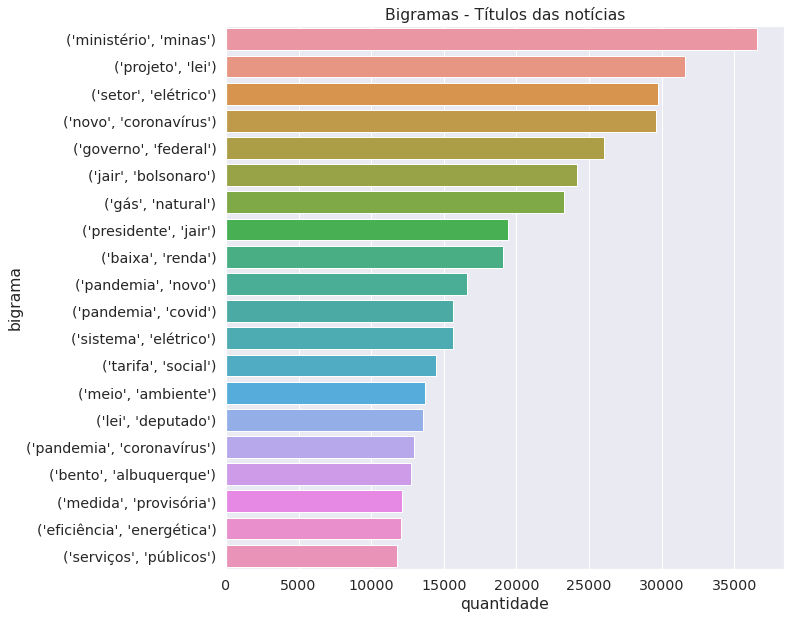

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

most_common_bigrams = frequent_bigramas.most_common(20)
most_common_bigrams = pd.DataFrame((most_common_bigrams), columns=['bigrama', 'quantidade'])

#fig, ax = plt.subplots(figsize=(15,10))
#all_plot = sns.barplot(x=most_common_bigrams['bigrama'], y=most_common_bigrams['quantidade'], ax=ax)
#plt.xticks(rotation=60)

sns.set(font_scale = 1.3)
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(y=most_common_bigrams['bigrama'], x=most_common_bigrams['quantidade'], ax=ax, orient='h')

#plt.title('Bigramas - Íntegra das notícias')
plt.title('Bigramas - Títulos das notícias')

##Trigramas

In [10]:
lista_trigramas = list(nltk.trigrams(tokens))
lista_trigramas[0:10]

[('prefeito', 'mauá', 'atila'),
 ('mauá', 'atila', 'jacomussi'),
 ('atila', 'jacomussi', 'psb'),
 ('jacomussi', 'psb', 'decidiu'),
 ('psb', 'decidiu', 'dar'),
 ('decidiu', 'dar', 'tratamentos'),
 ('dar', 'tratamentos', 'diferentes'),
 ('tratamentos', 'diferentes', 'duas'),
 ('diferentes', 'duas', 'autarquias'),
 ('duas', 'autarquias', 'municipais')]

In [11]:
frequent_trigramas = nltk.FreqDist(lista_trigramas)
frequent_trigramas.most_common(10)

[(('presidente', 'jair', 'bolsonaro'), 19242),
 (('pandemia', 'novo', 'coronavírus'), 15363),
 (('projeto', 'lei', 'deputado'), 13517),
 (('ministério', 'minas', 'mme'), 9190),
 (('minas', 'bento', 'albuquerque'), 8153),
 (('ministro', 'minas', 'bento'), 8007),
 (('operador', 'sistema', 'elétrico'), 7745),
 (('rio', 'grande', 'sul'), 6550),
 (('diário', 'oficial', 'união'), 6131),
 (('sistema', 'elétrico', 'ons'), 5989)]

Text(0.5, 1.0, 'Trigramas - Títulos das notícias')

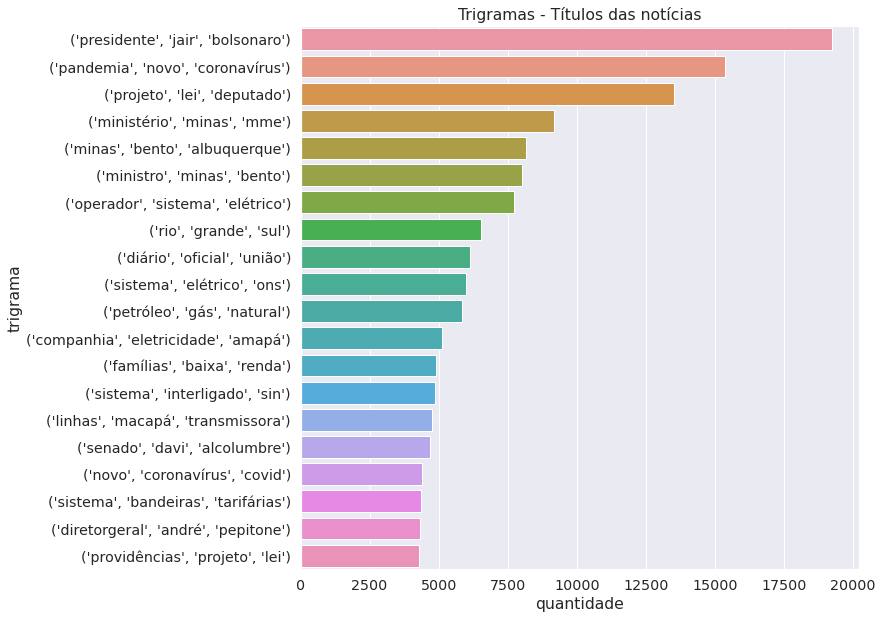

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

most_common_trigrams = frequent_trigramas.most_common(20)
most_common_trigrams = pd.DataFrame((most_common_trigrams), columns=['trigrama', 'quantidade'])

#fig, ax = plt.subplots(figsize=(15,10))
#all_plot = sns.barplot(x=most_common_trigrams['trigrama'], y=most_common_trigrams['quantidade'], ax=ax)
#plt.xticks(rotation=75)

sns.set(font_scale = 1.3)
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(y=most_common_trigrams['trigrama'], x=most_common_trigrams['quantidade'], ax=ax, orient='h')

#plt.title('Trigramas - Íntegra das notícias')
plt.title('Trigramas - Títulos das notícias')